In [4]:
from os import walk
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks_cwt
from scipy import constants

In [5]:
start_freq = 500e3
end_freq = 9e6

In [8]:
import math

mu_null = 1.2566e-6
N = 80
R = 9e-2
b_i = lambda cur: cur * (mu_null * 8 *N / (math.sqrt(125) * R))

(4668765586.061255, 6978792404.2193775)

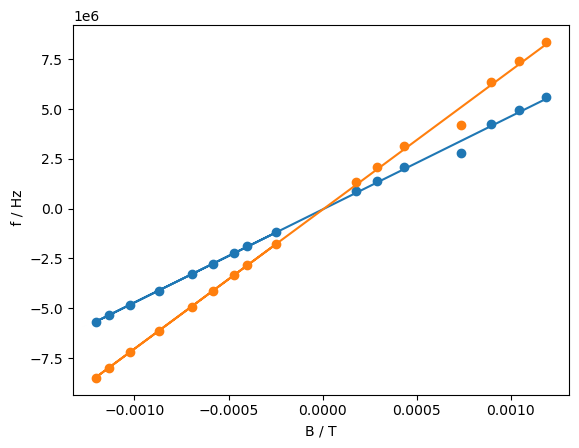

In [12]:
path = '../data/Frequenzmodulation'
filenames = next(walk(path))[2]
currents = []
zeeman_freqs_1 = []
zeeman_freqs_2 = []

for i, filename in enumerate(filenames):
    data = np.loadtxt(path + '/' + filename)
    currents.append(float(filename.replace(',', '.')))

    time = data[:,0]
    freq_trig = data[:,1]
    transmission = data[:,2]

    trigger_val = 1.5
    rising_trig = np.flatnonzero((freq_trig[:-1] < trigger_val) & (freq_trig[1:] > trigger_val)) + 1

    start_freq_modulation = time[rising_trig[0]]
    end_freq_modulation = time[rising_trig[1]]
    freq_time_slope = (end_freq - start_freq) /(end_freq_modulation - start_freq_modulation)

    calc_freq = lambda t: (time[t] - start_freq_modulation) * freq_time_slope + start_freq

    lowest_transmisstion_peaks = find_peaks_cwt(-transmission, widths=5)
    lowest_two_transmission_peak_freqs = calc_freq(lowest_transmisstion_peaks[(transmission[lowest_transmisstion_peaks]).argsort()[:2]])


    zeeman_freqs_1.append(lowest_two_transmission_peak_freqs[0])
    zeeman_freqs_2.append(lowest_two_transmission_peak_freqs[1])

fig, ax = plt.subplots()

currents = np.array(currents)
ax.scatter(b_i(currents), zeeman_freqs_1 * np.sign(currents))
ax.scatter(b_i(currents), zeeman_freqs_2 * np.sign(currents))

slope_1, intercept_1, r_1, p_1, std_err_1 = stats.linregress(b_i(currents), zeeman_freqs_1 * np.sign(currents))
slope_2, intercept_2, r_2, p_2, std_err_2 = stats.linregress(b_i(currents), zeeman_freqs_2 * np.sign(currents))
ax.plot(b_i(currents), slope_1 * b_i(currents) + intercept_1)
ax.plot(b_i(currents), slope_2 * b_i(currents) + intercept_2 )

ax.set(xlabel='B / T', ylabel=' f / Hz')
slope_1, slope_2

In [13]:
mu_b, _, _ = constants.physical_constants['Bohr magneton']
gf = lambda a : constants.h * a / mu_b

In [14]:
gf(slope_1), gf(slope_2)

(0.3335727266410139, 0.4986189107217497)